In [2]:
import pandas as pd 
import warnings as wr 
wr.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('weight-height.csv')
df.head()
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df1.Gender = le.fit_transform(df1[['Gender']])

In [11]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [12]:
df1.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [14]:
# Separate X (Gender, Height) and Y (y=Weight)
X = df1[['Gender', 'Height']]
y = df1['Weight']

In [15]:
# Train = 70%, Test = 30%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [17]:
# Apply Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Evaluate the Model (Testing and training Accuracy, MSE for testing)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

In [19]:
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)
lr_test_mse = mean_squared_error(y_test, y_test_pred_lr)

In [20]:
lr_train_r2

0.8973793060969246

In [21]:
lr_test_r2

0.9059112424422658

In [22]:
lr_test_mse

96.83734437830613

# EDA

# Regression Problem

In [23]:
# Apply KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [24]:
# Evaluate the Model (Testing and training Accuracy, MSE for testing)
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

In [25]:
knn_train_r2 = r2_score(y_train, y_train_pred_knn)
knn_test_r2 = r2_score(y_test, y_test_pred_knn)
knn_test_mse = mean_squared_error(y_test, y_test_pred_knn)

# Classification Problem

In [30]:
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [36]:
# Separate X and Y. (y=Gender)
X_cls = df2[['Height', 'Weight']]
y_cls = df2['Gender']

In [37]:
le = LabelEncoder()
y_encoded = le.fit_transform(y_cls)

In [38]:
# Train = 70%, Test = 30%
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_encoded, test_size=0.3, random_state=42)


In [39]:
# Apply KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_cls, y_train_cls)

KNeighborsClassifier()

In [40]:
# Evaluate the Model by only Accuracy
y_pred_cls = knn_classifier.predict(X_test_cls)
accuracy_cls = accuracy_score(y_test_cls, y_pred_cls)

In [41]:
accuracy_cls

0.9131281651733542

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train_cls, y_train_cls)


LogisticRegression()

In [43]:
y_pred_log = log_reg.predict(X_test_cls)
accuracy_log = accuracy_score(y_test_cls, y_pred_log)

In [44]:
accuracy_log

0.9185820023373588

# Comparison of Linear Rgeression and KNN Regressor

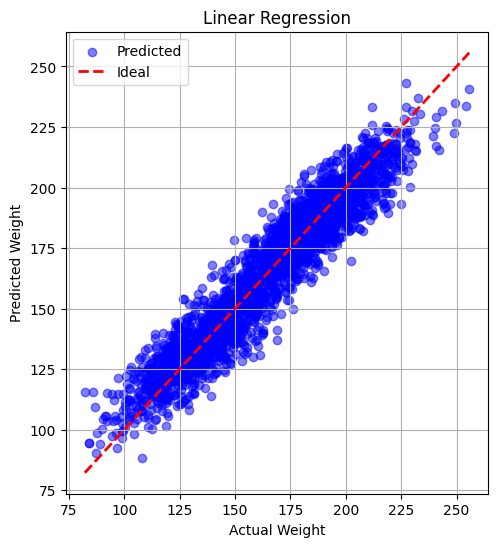

In [26]:
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_lr, color='blue', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.title("Linear Regression")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.legend()
plt.grid(True)

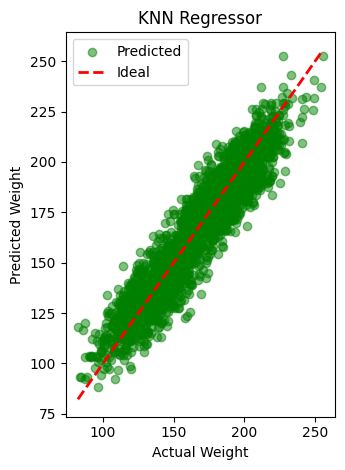

In [29]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_knn, color='green', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.title("KNN Regressor")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.legend()

plt.tight_layout()
plt.show()

# Comparison of Logistic Rgeression and KNN Classifier

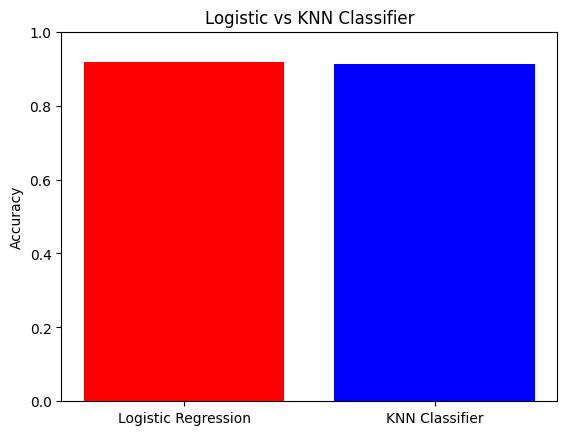

In [45]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.bar(['Logistic Regression', 'KNN Classifier'], [accuracy_log, accuracy_cls], color=['red', 'blue'])
plt.ylabel('Accuracy')
plt.title('Logistic vs KNN Classifier')
plt.ylim(0, 1)

plt.show()
